a calculer
- duration from tags and from tool
- energy conso (kWh)
- carbon
- variance entre exp pour une meme benchmark

In [1]:
import sys
sys.path.append("/home/mjay/GPU_benchmark_energy/code/")

In [2]:
from utils.process_results import add_benchmark_id_to_merged_timeseries, cleaning_table
from utils.tools import convert_energy_kWh_in_joules
import pandas as pd
import matplotlib.pyplot as plt

/home/mjay/.local/lib/python3.9/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
#repo_dir = "/Users/mathildepro/Documents/code_projects/GPU_benchmarks/" #
repo_dir = "/home/mjay/GPU_benchmark_energy/" 
#prefix = [repo_dir + "results/night_exp_20_04/", repo_dir + "results/night_exp_19_04/"]
prefix = [repo_dir + "results/night_exp_08_11/"]

energy_scope_df = pd.concat([pd.read_csv(file + 'es_ts.csv') for file in prefix])
watt_df = pd.concat([pd.read_csv(file + 'g5k_metrics.csv') for file in prefix])
exp_table = pd.concat([pd.read_csv(file + 'processed_table.csv') for file in prefix])

exp_table = cleaning_table(exp_table, watt_df, energy_scope_df)

grouped_watt_df = watt_df.groupby(by=['timestamp_sec']).mean().reset_index()
merged_df = pd.merge(energy_scope_df,grouped_watt_df, on='timestamp_sec', how='outer').sort_values(by=['timestamp_sec'])

merged_df['wattmetre_es_diff'] = abs(merged_df['wattmetre_power_watt'] - merged_df['data.data.etotal(W)'])

b_df = add_benchmark_id_to_merged_timeseries(exp_table, merged_df)

[]
60    NaN
61    5.0
62    5.0
63    5.0
64    5.0
Name: timestamp_sec, dtype: float64
60    1044.0
61    1044.0
62    1044.0
63    1044.0
64    1044.0
Name: bmc_node_power_watt, dtype: float64
    timestamp_sec  bmc_node_power_watt  energy(Ws)
60   1.667858e+09               1044.0         NaN
61   1.667858e+09               1044.0      5220.0
62   1.667858e+09               1044.0      5220.0
63   1.667858e+09               1044.0      5220.0
64   1.667858e+09               1044.0      5220.0
65   1.667858e+09               1044.0      5220.0
66   1.667858e+09               1044.0      5220.0
67   1.667858e+09               1044.0      5220.0
68   1.667858e+09               1044.0      5220.0
69   1.667858e+09               1044.0      5220.0
70   1.667858e+09               1044.0      5220.0
71   1.667858e+09               1044.0      5220.0
118    NaN
119    5.0
120    5.0
121    5.0
122    5.0
Name: timestamp_sec, dtype: float64
118    1080.0
119    1116.0
120    1044.0
121    1

In [4]:
exp_table.groupby(by=['tool_on_one_process', 'tool_name','gpu_0_appli','gpu_0_appli_class']).count()

experiment_start  \
tool_on_one_process tool_name                 gpu_0_appli gpu_0_appli_class                     
False               carbon_tracker            ep          D                                10   
                                              idle        sh                               10   
                                              lu          C                                10   
                                              mg          D                                10   
                    codecarbon                ep          D                                10   
                                              idle        sh                               10   
                                              lu          C                                10   
                                              mg          D                                10   
                    energy scope              ep          D                                10   
                                              idle        sh                               10   
                                              lu          C                                10   
                                              mg          D                                10   
                    experiment_impact_tracker ep          D                                10   
                                              idle        sh                                2   
                                              lu          C                                10   
                                              mg          D                                10   

                                                                             experiment_end  \
tool_on_one_process tool_name                 gpu_0_appli gpu_0_appli_class                   
False               carbon_tracker            ep          D                              10   
                                              idle        sh                             10   
                                              lu          C                              10   
                                              mg          D                              10   
                    codecarbon                ep          D                              10   
                                              idle        sh                             10   
                                              lu          C                              10   
                                              mg          D                              10   
                    energy scope              ep          D                              10   
                                              idle        sh                             10   
                                              lu          C                              10   
                                              mg          D                              10   
                    experiment_impact_tracker ep          D                              10   
                                              idle        sh                              2   
                                              lu          C                              10   
                                              mg          D                              10   

                                                                             gpu_0_start_benchmark  \
tool_on_one_process tool_name                 gpu_0_appli gpu_0_appli_class                          
False               carbon_tracker            ep          D                                     10   
                                              idle        sh                                    10   
                                              lu          C                                     10   
                                              mg          D                                     10   
       

In [6]:
[x for x in exp_table.columns if 'seconds' in x or 'time' in x or 'start' in x or 'stop' in x]

['experiment_start',
 'gpu_0_start_benchmark',
 'gpu_0_stop_benchmark',
 'tool_duration(seconds)',
 'tool_timestamp(seconds)']

In [7]:
exp_table['benchmark_duration(diff)'] = exp_table['gpu_0_stop_benchmark'] - exp_table['gpu_0_start_benchmark']

In [8]:
exp_table[(exp_table['tool_on_one_process']==False)&(exp_table['tool_name']=='NoTool')].groupby(by=['gpu_0_appli','gpu_0_appli_class'])[['benchmark_duration(diff)']].mean()

Empty DataFrame
Columns: [benchmark_duration(diff)]
Index: []

In [9]:
exp_table[(exp_table['tool_on_one_process']==False)&(exp_table['tool_name']=='NoTool')].groupby(by=['gpu_0_appli','gpu_0_appli_class'])[['benchmark_duration(diff)']].std()

Empty DataFrame
Columns: [benchmark_duration(diff)]
Index: []

# Plots

In [10]:
figsize = (10,7)
fig, ax = plt.subplots(1, figsize=figsize)
cols = ['tool_energy_consumption(kWh)_no_PUE', 'tool_energy_consumption(kWh)', 'bmc_node_power_watt_energy_consumption(kWh)', 'wattmetre_power_watt_energy_consumption(kWh)'] #, 'bmc_node_power_watt_energy_consumption(kWh)', 'wattmetre_power_watt_energy_consumption(kWh)']
exp_table.groupby(['gpu_0_appli','gpu_0_appli_class','tool_name', 'gpu_0_benchmark_id', 'tool_on_one_process']).mean().plot(
    ax=ax, 
    #x='sec',
    y=cols,
    kind='bar',
    )
ax.set_xlabel('Timestamps (seconds)', fontsize=15)
ax.set_ylabel('Total energy (kWh)', fontsize=15)
ax.legend(bbox_to_anchor=(1, 1))
#ax.set_title('Evolution of the total power during an experiment from energy scope.', y=-0.12, fontsize=20)

In [11]:
def plot_bar(
    table,
    cols = ['tool_energy_consumption(kWh)_no_PUE', 'tool_energy_consumption(kWh)', 'bmc_node_power_watt_energy_consumption(kWh)', 'wattmetre_power_watt_energy_consumption(kWh)'],
    group_by_cols = ['gpu_0_appli','gpu_0_appli_class','tool_name'],
    title = "Comparing tools' results",

):
    figsize = (15,7)
    fig, axes = plt.subplots(
        1, 
        2, 
        figsize=figsize,
        sharex=False, 
        sharey=False,
    )
    fig.suptitle(title, fontsize=20)
    axes[0] = table.groupby(by=group_by_cols).mean().plot(
        ax=axes[0], 
        #x='sec',
        y=cols,
        kind='bar',
        )
    axes[0].set_ylabel('Energy (kWh)', fontsize=15)
    axes[0].legend(bbox_to_anchor=(1, 1))
    axes[0].set_title('Average energy.', fontsize=20) #  y=-0.12, 

    axes[1] = table.groupby(group_by_cols).var().plot(
        ax=axes[1], 
        #x='sec',
        y=cols,
        kind='bar',
        )
    axes[1].set_ylabel('Energy (kWh)', fontsize=15)
    axes[1].legend(bbox_to_anchor=(1, 1))
    axes[1].set_title('Variance energy.', fontsize=20) # y=-0.12,


    return fig, axes

In [12]:
list(exp_table.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index)

[('ep', 'D'), ('idle', 'sh'), ('lu', 'C'), ('mg', 'D')]

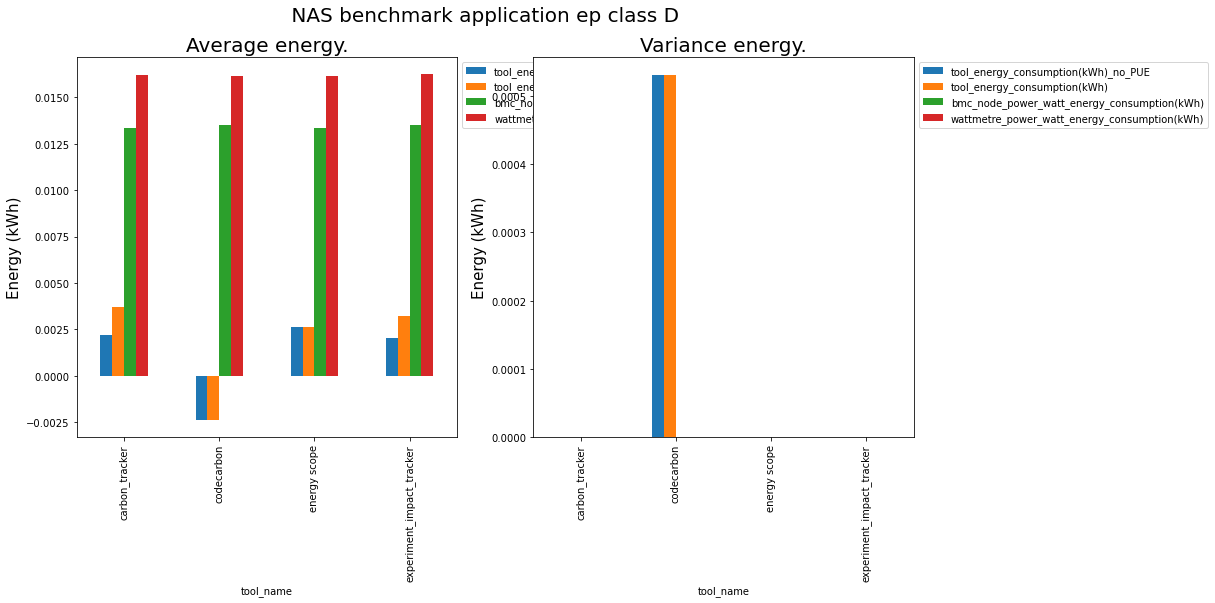

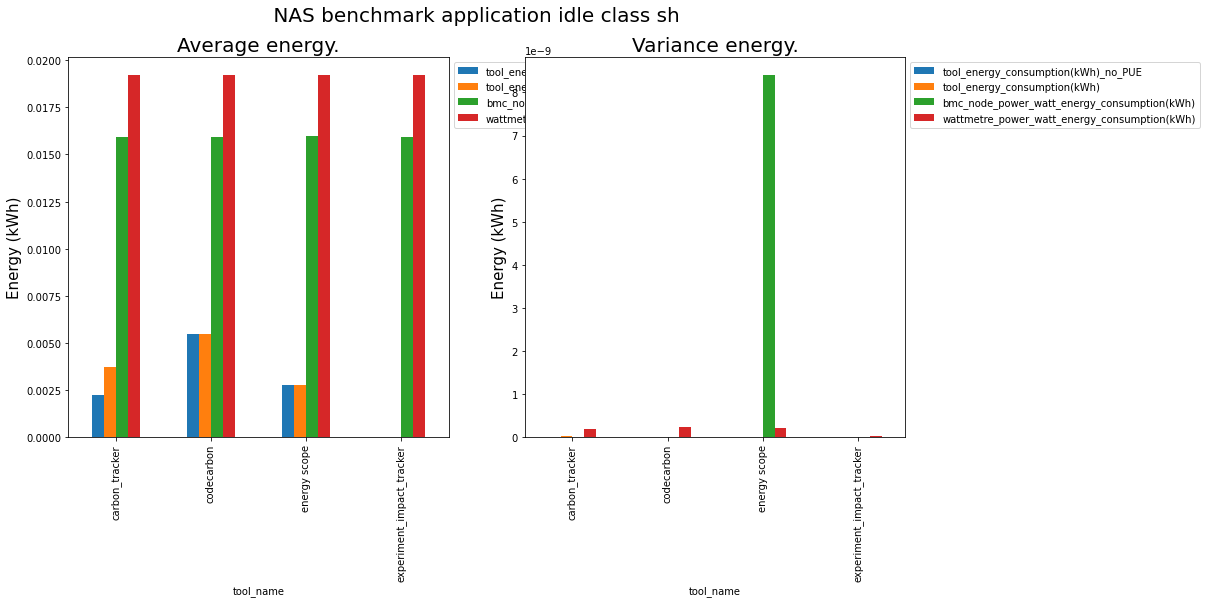

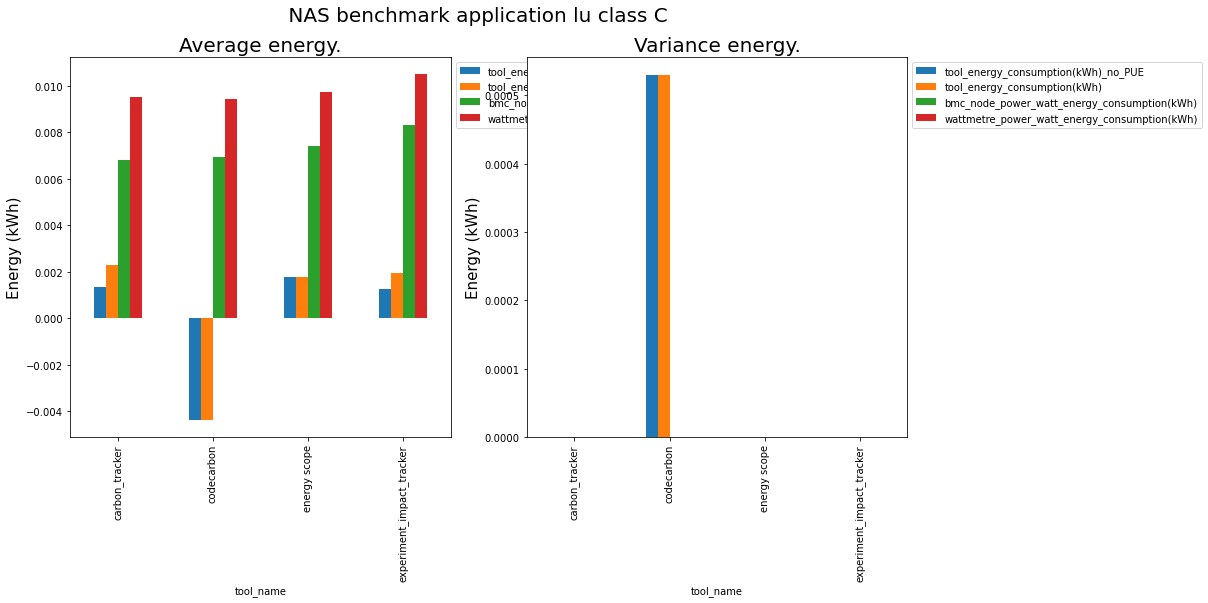

In [13]:
group_by_cols = ['tool_name']
for appli, appli_class in list(exp_table.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index):
    title = " NAS benchmark application {} class {}".format(appli, appli_class)
    _, _ = plot_bar(
        exp_table[(exp_table['gpu_0_appli']==appli)&(exp_table['gpu_0_appli_class']==appli_class)&(exp_table['tool_on_one_process']==False)], 
        group_by_cols=group_by_cols,
        title=title,
        ) 

# Nicer plots

In [14]:
exp_table['wattmetre_power_watt_energy_consumption(joule)'] = exp_table['wattmetre_power_watt_energy_consumption(kWh)'].apply(convert_energy_kWh_in_joules)*10**(-3)
exp_table['bmc_node_power_watt_energy_consumption(joule)'] = exp_table['bmc_node_power_watt_energy_consumption(kWh)'].apply(convert_energy_kWh_in_joules)*10**(-3)
exp_table['tool_energy_consumption(joule)_no_PUE'] = exp_table['tool_energy_consumption(kWh)_no_PUE'].apply(convert_energy_kWh_in_joules)*10**(-3)
exp_table['tool_energy_joule_error'] = (exp_table['wattmetre_power_watt_energy_consumption(joule)'] - exp_table['tool_energy_consumption(joule)_no_PUE'])
exp_table['tool_energy_joule_error_perc'] = (exp_table['wattmetre_power_watt_energy_consumption(joule)'] - exp_table['tool_energy_consumption(joule)_no_PUE'])/exp_table['wattmetre_power_watt_energy_consumption(joule)']

In [15]:
exp_table[exp_table['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])['tool_energy_joule_error_perc']

/tmp/ipykernel_40977/438493699.py:1: FutureWarning: ['tool_components', 'result_dir', 'gpu_0_name', 'gpu_0_binary_dir', 'gpu_0_appli', 'gpu_0_appli_class', 'gpu_0_execution_script_template', 'gpu_0_execution_script_path', 'gpu_0_binary_path', 'host_name', 'site', 'node', 'cpu_name', 'tool_run_id', 'tool_country_name', 'tool_country_iso_code', 'tool_os', 'tool_python_version', 'tool_cpu_model', 'tool_tracking_mode', 'tool_on_cloud', 'tool_csv_file', 'tool_parameters', 'source_dir', 'es_execution_command', 'es_analysis_command', 'launch_parallel_script', 'trace_tar_file', 'trace_eprofile', 'log_dirs'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  exp_table[exp_table['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])['tool_energy_joule_error_perc']


mean       std
tool_name                                    
carbon_tracker             0.867744  0.010241
codecarbon                 1.002918  1.372108
energy scope               0.832021  0.016485
experiment_impact_tracker  0.881327  0.031922

In [16]:
exp_table['tool_name'].unique()

array(['carbon_tracker', 'codecarbon', 'energy scope',
       'experiment_impact_tracker'], dtype=object)

In [17]:
plot_df = exp_table.copy()

def modify_tool_name(cell):
    if cell == 'carbon_tracker':
        return 'CT'
    if cell == 'codecarbon':
        return 'CC'
    if cell == 'energy scope':
        return 'ES'
    if cell == 'experiment_impact_tracker':
        return 'EIT'
    if cell == 'NoTool':
        return 'None'

plot_df['tool_name'] = plot_df['tool_name'].apply(modify_tool_name)
plot_df['tool_name']

0       CT
1       CT
2       CT
3       CT
4       CC
      ... 
147    EIT
148    EIT
149    EIT
150    EIT
151    EIT
Name: tool_name, Length: 152, dtype: object

In [18]:
# computations made in 'online tools.ipynb'
to_concat = {
    'External\npower meter':[175665.6, 405903.6, 168228.0, 175665.6, 405903.6, 168228.0], 
    'BMC':[152326.8, 366130.8, 146700.0, 152326.8, 366130.8, 146700.0], 
    'Tool':[176174.4, 381643.2, 134329.2, 163200.0, 342720.0, 276320.0], 
    'Offset':[508.8, 24260.4, 33898.8, 12465.6, 63183.6, 108092.0], 
    'tool_name':['GA', 'GA', 'GA', 'MCI', 'MCI', 'MCI'], 
    'gpu_0_appli':['ep', 'lu', 'mg', 'ep', 'lu', 'mg'],
    'gpu_0_appli_class':['E', 'D', 'D', 'E', 'D', 'D'],
    'tool_on_one_process':[False,False,False,False,False,False]
    }
df_to_concat = pd.DataFrame(to_concat)
df_to_concat

External\npower meter       BMC      Tool    Offset tool_name gpu_0_appli  \
0               175665.6  152326.8  176174.4     508.8        GA          ep   
1               405903.6  366130.8  381643.2   24260.4        GA          lu   
2               168228.0  146700.0  134329.2   33898.8        GA          mg   
3               175665.6  152326.8  163200.0   12465.6       MCI          ep   
4               405903.6  366130.8  342720.0   63183.6       MCI          lu   
5               168228.0  146700.0  276320.0  108092.0       MCI          mg   

  gpu_0_appli_class  tool_on_one_process  
0                 E                False  
1                 D                False  
2                 D                False  
3                 E                False  
4                 D                False  
5                 D                False

In [19]:
df_to_concat['External\npower meter'] = df_to_concat['External\npower meter']*10**(-3)
df_to_concat['BMC'] = df_to_concat['BMC']*10**(-3)
df_to_concat['Tool'] = df_to_concat['Tool']*10**(-3)
df_to_concat['Offset'] = df_to_concat['Offset']*10**(-3)

In [20]:
df_to_concat

External\npower meter       BMC      Tool    Offset tool_name gpu_0_appli  \
0               175.6656  152.3268  176.1744    0.5088        GA          ep   
1               405.9036  366.1308  381.6432   24.2604        GA          lu   
2               168.2280  146.7000  134.3292   33.8988        GA          mg   
3               175.6656  152.3268  163.2000   12.4656       MCI          ep   
4               405.9036  366.1308  342.7200   63.1836       MCI          lu   
5               168.2280  146.7000  276.3200  108.0920       MCI          mg   

  gpu_0_appli_class  tool_on_one_process  
0                 E                False  
1                 D                False  
2                 D                False  
3                 E                False  
4                 D                False  
5                 D                False

In [21]:
df_to_concat['tool_energy_joule_error_perc'] = (df_to_concat['External\npower meter'] - df_to_concat['Tool'])/df_to_concat['External\npower meter']

In [22]:
df_to_concat[df_to_concat['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])[['tool_energy_joule_error_perc']]

/tmp/ipykernel_40977/2878626220.py:1: FutureWarning: ['gpu_0_appli', 'gpu_0_appli_class'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_to_concat[df_to_concat['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])[['tool_energy_joule_error_perc']]


tool_energy_joule_error_perc          
                                  mean       std
tool_name                                       
GA                            0.086126  0.104719
MCI                          -0.138636  0.438437

In [23]:
#plot_df = pd.concat([plot_df, df_to_concat])

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/bar_energy_plots.pdf'

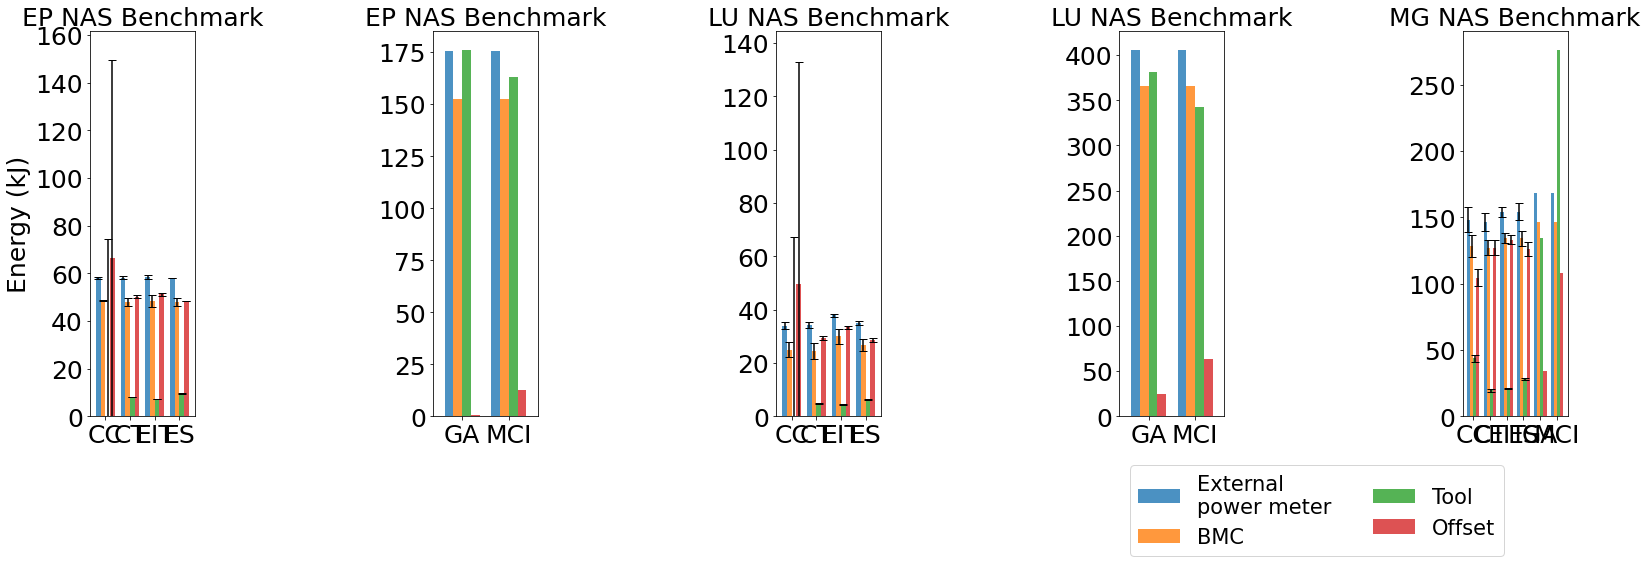

In [24]:
from matplotlib import hatch


cols = ['wattmetre_power_watt_energy_consumption(joule)', 'bmc_node_power_watt_energy_consumption(joule)', 'tool_energy_consumption(joule)_no_PUE', 'tool_energy_joule_error'] #, 'tool_energy_joule_error_perc']
new_cols = ['External\npower meter', 'BMC', 'Tool', 'Offset'] #, 'perc. offset \n|Wattmetre - Tool|/Wattmetre']
plot_df = plot_df.rename(columns={cols[i]: new_cols[i] for i in range(len(cols))})
plot_df = pd.concat([plot_df, df_to_concat])
# group_by_cols = ['gpu_0_appli','gpu_0_appli_class','tool_name']
group_by_cols = ['tool_name']
figsize = (22,8)
exp_nb = len(list(plot_df.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index)) -1
fig, axes = plt.subplots(
    1, 
    exp_nb, 
    figsize=figsize,
    sharex=False, 
    sharey=False,
)
i=0
hatches=['.', '/', 'o', '//']
for appli, appli_class in list(plot_df.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index):
    title = "{} NAS Benchmark".format(appli.upper(), appli_class)
    if appli=='idle':
        title='Idle (60 seconds)'
        continue
    table = plot_df[
        (plot_df['gpu_0_appli']==appli
        )&(
        plot_df['gpu_0_appli_class']==appli_class
        )&(
        plot_df['tool_on_one_process']==False
        )&(
        plot_df['tool_name']!='None'
        )]
    axes[i] = table.groupby(by=group_by_cols).mean().plot(
        ax=axes[i], 
        y=new_cols,
        yerr=table.groupby(by=group_by_cols).std(),
        kind='bar',
        rot=0,
        fontsize=25,
        capsize=4,
        linewidth=2,
        width=0.75,
        alpha=0.8,
        )
    #axes[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    axes[i].set_ylim(bottom=0)
    if i==0:
        axes[i].set_ylabel('Energy (kJ)', fontsize=25)
    axes[i].set_xlabel('')
    if i==exp_nb-2:
        axes[i].legend(bbox_to_anchor=(0, -0.1), fontsize=21, ncol=2,loc='upper left')
    else:
        axes[i].get_legend().remove()
    axes[i].set_title(title, fontsize=25) #  y=-0.12, 
    i+=1

# fig.tight_layout()
# fig.legend(
#     axes[i].get_lines(), 
#     new_cols, 
#     bbox_to_anchor=(0.5,0), 
#     loc='upper center',
#     fontsize=20,
#     ncol=6,
# )

#title = "Comparing tools' energy output with wattmeters"
#fig.suptitle(title, fontsize=20)
fig.tight_layout()
fig.savefig("/Users/mathildepro/Documents/code_projects/GPU_benchmarks/graphes/bar_energy_plots.pdf")


In [25]:
plot_df[plot_df['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])[['Offset \n|Wattmetre - Tool|', 'Wattmetre']]

/tmp/ipykernel_40977/3070892673.py:1: FutureWarning: ['tool_components', 'result_dir', 'gpu_0_name', 'gpu_0_binary_dir', 'gpu_0_appli', 'gpu_0_appli_class', 'gpu_0_execution_script_template', 'gpu_0_execution_script_path', 'gpu_0_binary_path', 'host_name', 'site', 'node', 'cpu_name', 'tool_run_id', 'tool_country_name', 'tool_country_iso_code', 'tool_os', 'tool_python_version', 'tool_cpu_model', 'tool_tracking_mode', 'tool_on_cloud', 'tool_csv_file', 'tool_parameters', 'source_dir', 'es_execution_command', 'es_analysis_command', 'launch_parallel_script', 'trace_tar_file', 'trace_eprofile', 'log_dirs'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  plot_df[plot_df['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])[['Offset \n|Wattmetre - Tool|', 'Wattmetre']]


KeyError: "['Offset \\n|Wattmetre - Tool|' 'Wattmetre'] not in index"

Remarks:
- With PUE higher than wattmetre -> should have a way to remove PUE in librairie
- Without PUE:
    - resonable results (to quantify)
    - higher variability between tools when memory is involve (MG)
- EIT is close to 0 for idle experiment -> proof of computing energy for the process uniquely?
- Tools are more accurate for EP and LU than MG in average
- CodeCarbon is the best, right after energy scope

! log scale !
- higher variance for MG (other are in 1e-6)
- EIT has a higher variability
- BMC more variable than any other tool
- except for MG, wattmetres are more variable than the tools


# Removing static offset
autre manière de le dire : remove idle

In [ ]:
exp_table.groupby(['tool_name', 'gpu_0_appli', 'gpu_0_appli_class']).count()

tool_on_one_process  \
tool_name                 gpu_0_appli gpu_0_appli_class                        
NoTool                    ep          E                                   12   
                          idle        sh                                  12   
                          lu          D                                   12   
                          mg          D                                   12   
carbon_tracker            ep          E                                   18   
                          idle        sh                                  18   
                          lu          D                                   18   
                          mg          D                                   18   
codecarbon                ep          E                                   20   
                          idle        sh                                  20   
                          lu          D                                   20   
                          mg          D                                   20   
energy scope              ep          E                                   12   
                          idle        sh                                  12   
                          lu          D                                   12   
                          mg          D                                   12   
experiment_impact_tracker ep          E                                   10   
                          idle        sh                                   4   
                          lu          D                                   10   
                          mg          D                                   10   

                                                         experiment_start  \
tool_name                 gpu_0_appli gpu_0_appli_class                     
NoTool                    ep          E                                12   
                          idle        sh                               12   
                          lu          D                                12   
                          mg          D                                12   
carbon_tracker            ep          E                                18   
                          idle        sh                               18   
                          lu          D                                18   
                          mg          D                                18   
codecarbon                ep          E                                20   
                          idle        sh                               20   
                          lu          D                                20   
                          mg          D                                20   
energy scope              ep          E                                12   
                          idle        sh                               12   
                          lu          D                                12   
                          mg          D                                12   
experiment_impact_tracker ep          E                                10   
                          idle        sh                                4   
                          lu          D                                10   
                          mg          D                                10   

                                                         experiment_end  \
tool_name                 gpu_0_appli gpu_0_appli_class                   
NoTool                    ep          E                              12   
                          idle        sh                             12   
                          lu          D                              12   
                          mg          D                              12   
carbon_tracker            ep          E                              18   
                          idle        sh                             18   
 

In [ ]:
exp_table[(exp_table['gpu_0_appli']=='idle')&(exp_table['gpu_0_appli_class']=='sh')]['tool_name'].unique()

array(['carbon_tracker', 'codecarbon', 'experiment_impact_tracker',
       'energy scope', 'NoTool'], dtype=object)

In [ ]:
def compute_static_offset(df):

    df = df[df['tool_on_one_process']==False].copy()
    df = df.sort_values(by=['tool_name', 'gpu_0_appli', 'gpu_0_appli_class'])
    grouped_table = df.groupby(['tool_name', 'gpu_0_appli', 'gpu_0_appli_class'])
    static_offsets = []

    for name, group in grouped_table:
        tool_name, _, _ = name

        idle_tool_df = df[(df['gpu_0_appli']=='idle')&(df['gpu_0_appli_class']=='sh')&(df['tool_name']==tool_name)]
        avg_idle_watt = idle_tool_df['wattmetre_power_watt_energy_consumption(kWh)'].mean()
        avg_idle_tool = idle_tool_df['tool_energy_consumption(kWh)_no_PUE'].mean()
        static_offset_kwh = avg_idle_watt - avg_idle_tool
        static_offset_joule = convert_energy_kWh_in_joules(static_offset_kwh)
        
        static_offsets = static_offsets + [static_offset_joule for _ in range(len(group))]

    df['static_offset(joule)'] = static_offsets
    df['dynamic_tool_energy_joule_error'] = df['tool_energy_joule_error'] - df['static_offset(joule)']
    return df

dynamic_df = compute_static_offset(exp_table)

In [ ]:
dynamic_df['dynamic_tool_energy_joule_error'].describe()

count      154.000000
mean    -26247.312699
std      15594.930602
min     -53827.163356
25%     -24633.996344
50%     -20226.966206
75%     -10587.672014
max     -10510.944292
Name: dynamic_tool_energy_joule_error, dtype: float64

In [ ]:
cols = ['wattmetre_power_watt_energy_consumption(joule)', 'bmc_node_power_watt_energy_consumption(joule)', 'tool_energy_consumption(joule)_no_PUE', 'tool_energy_joule_error', 'dynamic_tool_energy_joule_error']
#new_cols = ['Wattmetre', 'BMC', 'Tool', 'Offset', 'Dynamic Offset']
#dynamic_df = dynamic_df.rename(columns={cols[i]: new_cols[i] for i in range(len(cols))})
# group_by_cols = ['gpu_0_appli','gpu_0_appli_class','tool_name']
group_by_cols = ['tool_name']
figsize = (40,12)
exp_nb = len(list(dynamic_df.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index))
fig, axes = plt.subplots(
    1, 
    exp_nb, 
    figsize=figsize,
    sharex=False, 
    sharey=True,
)
i=0
for appli, appli_class in list(dynamic_df.groupby(['gpu_0_appli','gpu_0_appli_class']).count().index):
    title = "{} - {}".format(appli.upper(), appli_class)
    if appli=='idle':
        title='Idle (60 seconds)'
        #continue
    table = dynamic_df[
        (dynamic_df['gpu_0_appli']==appli
        )&(
        dynamic_df['gpu_0_appli_class']==appli_class
        )&(
        dynamic_df['tool_on_one_process']==False
        )&(
        dynamic_df['tool_name']!='None'
        )]
    axes[i] = table.groupby(by=group_by_cols).mean().plot(
        ax=axes[i], 
        y=cols,
        yerr=table.groupby(by=group_by_cols).std(),
        kind='bar',
        rot=0,
        fontsize=15,
        capsize=4,
        linewidth=2,
        width=0.75,
        alpha=0.8,
        )
    axes[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #axes[i].set_ylim(bottom=0)
    if i==0:
        axes[i].set_ylabel('Energy (joule)', fontsize=20)
    axes[i].set_xlabel('')
    if i==exp_nb-1:
        axes[i].legend(bbox_to_anchor=(1, 1), fontsize=15)
    else:
        axes[i].get_legend().remove()
    axes[i].set_title(title, fontsize=20) #  y=-0.12, 
    i+=1

#title = "Comparing tools' energy output with wattmeters"
#fig.suptitle(title, fontsize=20)
fig.tight_layout()


In [ ]:
dynamic_df[dynamic_df['tool_on_one_process']==False].groupby(by=['tool_name']).agg(['mean','std'])[['dynamic_tool_energy_joule_error']]

dynamic_tool_energy_joule_error           
                                                     mean        std
tool_name                                                           
NoTool                                                NaN        NaN
carbon_tracker                              -24585.422823  42.242514
codecarbon                                  -10558.792988  26.234751
energy scope                                -20189.307728  33.867493
experiment_impact_tracker                   -53786.623943  35.162304